In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download("stopwords")

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.sequence import pad_sequences


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data=pd.read_csv("spam_ham_dataset.csv")
data=data[['label','text']]

In [7]:
data.shape

(5171, 2)

In [8]:
data.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


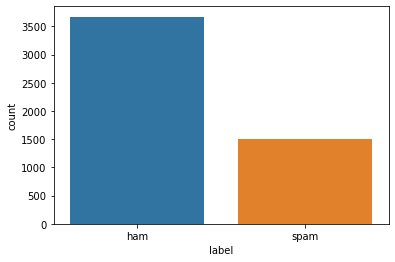

In [9]:
sns.countplot(x='label',data=data)
plt.show()

In [17]:
ham_msg=data[data.label=='ham']
spam_msg=data[data.label=='spam']
ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)
ham_msg

,label,text
2977,ham,Subject: conoco - big cowboy\r\ndarren :\r\ni ...
3822,ham,Subject: feb 01 prod : sale to teco gas proces...
2257,ham,Subject: california energy crisis\r\ncaliforni...
2786,ham,Subject: re : nom / actual volume for april 23...
4551,ham,Subject: eastrans nomination changes effective...
...,...,...
2877,ham,Subject: fw : duke energy trading and marketin...
3010,ham,"Subject: re : greatwood gas\r\nthanks , kyle ...."
1893,ham,Subject: tufco\r\nmy est . for tufco is the sa...
1106,ham,Subject: mobil discrepancies\r\ndaren :\r\ni '...


In [22]:
balanced_data=ham_msg.append(spam_msg).reset_index(drop=True)
balanced_data

,label,text
0,ham,Subject: conoco - big cowboy\r\ndarren :\r\ni ...
1,ham,Subject: feb 01 prod : sale to teco gas proces...
2,ham,Subject: california energy crisis\r\ncaliforni...
3,ham,Subject: re : nom / actual volume for april 23...
4,ham,Subject: eastrans nomination changes effective...
...,...,...
2993,spam,Subject: pictures\r\nstreamlined denizen ajar ...
2994,spam,Subject: penny stocks are about timing\r\nnoma...
2995,spam,Subject: anomaly boys from 3881\r\nuosda apapr...
2996,spam,Subject: slutty milf wants to meet you\r\ntake...


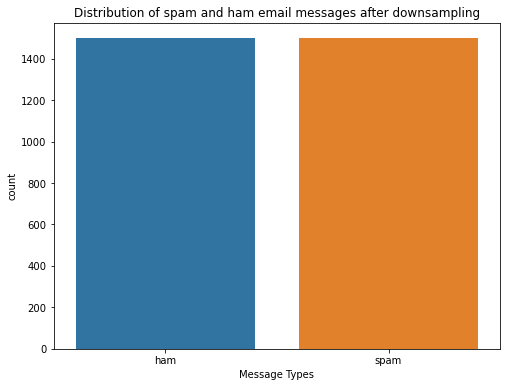

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='label',data=balanced_data)
plt.title("Distribution of spam and ham email messages after downsampling")
plt.xlabel("Message Types")
plt.show()

In [26]:
balanced_data['text']=balanced_data['text'].str.replace("Subject","")
balanced_data.head()

,label,text
0,ham,: conoco - big cowboy\r\ndarren :\r\ni ' m not...
1,ham,: feb 01 prod : sale to teco gas processing\r\...
2,ham,": california energy crisis\r\ncalifornia  , s..."
3,ham,: re : nom / actual volume for april 23 rd\r\n...
4,ham,: eastrans nomination changes effective 8 / 2 ...


In [32]:
punctuation_list=string.punctuation
def remove_punctuations(text):
    temp=str.maketrans('','',punctuation_list)
    return text.translate(temp)
balanced_data['text']=balanced_data['text'].apply(lambda x:remove_punctuations(x))
balanced_data.head()

,label,text
0,ham,conoco big cowboy\r\ndarren \r\ni m not sur...
1,ham,feb 01 prod sale to teco gas processing\r\ns...
2,ham,california energy crisis\r\ncalifornia  s p...
3,ham,re nom actual volume for april 23 rd\r\nwe ...
4,ham,eastrans nomination changes effective 8 2 0...


In [33]:
punctuation_list

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
stopwords=stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
from nltk.corpus import stopwords

In [42]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()


,label,text
0,ham,conoco big cowboy darren sure help know else a...
1,ham,feb 01 prod sale teco gas processing sale deal...
2,ham,california energy crisis california  power cr...
3,ham,nom actual volume april 23 rd agree eileen pon...
4,ham,eastrans nomination changes effective 8 2 00 p...


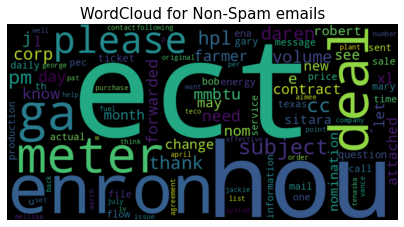

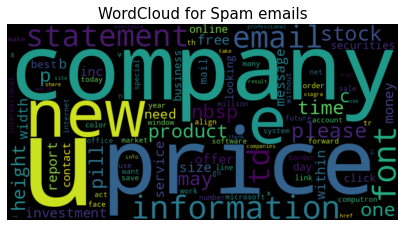

In [47]:
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])
#     print(email_corpus)

    plt.figure(figsize=(7, 7))

    wc = WordCloud(background_color='black',
                max_words=100,
                width=800,
                height=400,
                collocations=False).generate(email_corpus)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(balanced_data[balanced_data.label == 'ham'], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data.label == 'spam'], typ='Spam')

In [49]:
from sklearn.model_selection import train_test_split


In [75]:
def get(label):
    if label=='spam':
        return 1
    else:
        return 0
        

In [76]:
balanced_data['spam']=balanced_data['label'].apply(lambda x: get(x))

In [78]:
balanced_data.tail()

,label,text,spam
2993,spam,pictures streamlined denizen ajar chased heave...,1
2994,spam,penny stocks timing nomad international inc nd...,1
2995,spam,anomaly boys 3881 uosda apaproved mledms heure...,1
2996,spam,slutty milf wants meet take ilaa liqaa,1
2997,spam,important online banking alert dear valued cit...,1


In [79]:
X_train,X_test,y_train,y_test=train_test_split(balanced_data['text'],balanced_data['spam'],test_size=0.2,random_state=42)

In [80]:
#Tokenize the text data
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
train_sequence=tokenizer.texts_to_sequences(X_train)
test_sequence=tokenizer.texts_to_sequences(X_test)

In [81]:
max_len=100
train_sequences=pad_sequences(train_sequence,padding='post',truncating='post',maxlen=max_len)
test_sequences=pad_sequences(test_sequence,padding='post',truncating='post',maxlen=max_len)

In [82]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1,input_length=max_len,output_dim=32))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           1274912   
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,278,625
Trainable params: 1,278,625
Non-trainable params: 0
_________________________________________________________________


In [83]:
tokenizer.word_index

{'ect': 1,
 'hou': 2,
 'enron': 3,
 '2000': 4,
 'com': 5,
 '3': 6,
 'please': 7,
 '1': 8,
 '2': 9,
 '00': 10,
 'gas': 11,
 'subject': 12,
 'e': 13,
 'deal': 14,
 'meter': 15,
 'http': 16,
 'cc': 17,
 '000': 18,
 'pm': 19,
 '10': 20,
 '0': 21,
 '5': 22,
 'company': 23,
 '4': 24,
 'may': 25,
 'new': 26,
 'get': 27,
 'daren': 28,
 'hpl': 29,
 'thanks': 30,
 'information': 31,
 'corp': 32,
 '2001': 33,
 'price': 34,
 '7': 35,
 'need': 36,
 '01': 37,
 'know': 38,
 '99': 39,
 'us': 40,
 'www': 41,
 'email': 42,
 '9': 43,
 'see': 44,
 '11': 45,
 'one': 46,
 '12': 47,
 'time': 48,
 '6': 49,
 'j': 50,
 '03': 51,
 'forwarded': 52,
 '8': 53,
 'would': 54,
 'mail': 55,
 'p': 56,
 'statements': 57,
 'l': 58,
 'message': 59,
 'font': 60,
 'mmbtu': 61,
 'farmer': 62,
 '20': 63,
 'day': 64,
 'nbsp': 65,
 '30': 66,
 'let': 67,
 'b': 68,
 '15': 69,
 '02': 70,
 'also': 71,
 'attached': 72,
 'th': 73,
 'month': 74,
 'xls': 75,
 'x': 76,
 'energy': 77,
 '04': 78,
 'like': 79,
 '09': 80,
 'c': 81,
 'inc': 8

In [84]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'],
             optimizer='adam')

In [85]:
es=EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)
lr=ReduceLROnPlateau(patience=2,monitor='val_loss',factor=0.5,verbose=0)

In [86]:
# Train the model
history = model.fit(train_sequences, y_train,
                    validation_data=(test_sequences, y_test),
                    epochs=20,
                    batch_size=32,
#                     callbacks = [lr, es]
    )


Epoch 1/20
75/75 [==============================] - 13s 102ms/step - loss: 0.6907 - accuracy: 0.5438 - val_loss: 0.6763 - val_accuracy: 0.5950
Epoch 2/20
75/75 [==============================] - 6s 75ms/step - loss: 0.2965 - accuracy: 0.9178 - val_loss: 0.1698 - val_accuracy: 0.9583
Epoch 3/20
75/75 [==============================] - 7s 91ms/step - loss: 0.1449 - accuracy: 0.9658 - val_loss: 0.1765 - val_accuracy: 0.9567
Epoch 4/20
75/75 [==============================] - 6s 75ms/step - loss: 0.1721 - accuracy: 0.9529 - val_loss: 0.1884 - val_accuracy: 0.9650
Epoch 5/20
75/75 [==============================] - 6s 80ms/step - loss: 0.2562 - accuracy: 0.9299 - val_loss: 0.2555 - val_accuracy: 0.9217
Epoch 6/20
75/75 [==============================] - 8s 102ms/step - loss: 0.1645 - accuracy: 0.9575 - val_loss: 0.1690 - val_accuracy: 0.9583
Epoch 7/20
75/75 [==============================] - 7s 87ms/step - loss: 0.1022 - accuracy: 0.9796 - val_loss: 0.2171 - val_accuracy: 0.9483
Epoch 8/20

In [89]:
test_loss,test_accuracy=model.evaluate(test_sequences,y_test)
print('Test loss: ',test_loss)
print("Test Accuracy: ",test_accuracy)

19/19 [==============================] - 0s 15ms/step - loss: 0.1618 - accuracy: 0.9700
Test loss:  0.16182658076286316
Test Accuracy:  0.9700000286102295


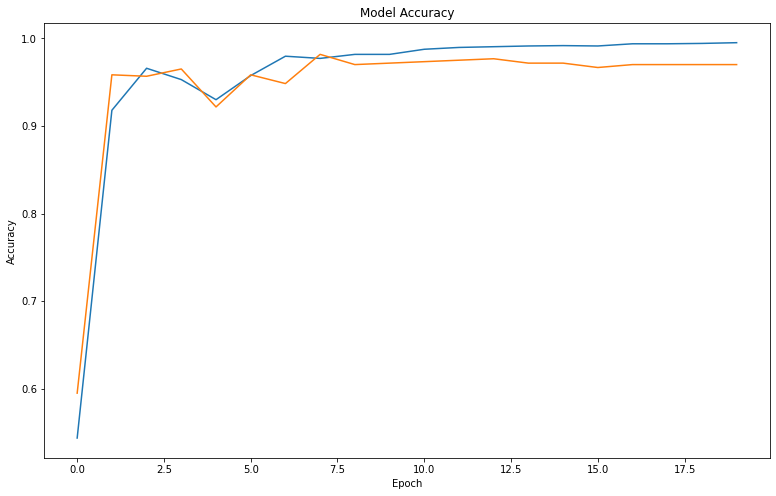

In [93]:
plt.figure(figsize=(13,8))
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()